# Voronoi Diagram
Enrico Borriello, July 2nd, 2025

A Voronoi diagram divides the plane into regions based on proximity to a set of given points. Each point has a corresponding cell that contains all the locations closer to it than to any other point. Below is a simple example of code to visualize a Voronoi diagram.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

In [104]:
def generate_points(N, x_min, x_max, y_min, y_max):
    """
    Generate N random 2D points within the given rectangle.
    
    Parameters:
        N (int): Number of points to generate
        x_min, x_max (float): Bounds for x-coordinates
        y_min, y_max (float): Bounds for y-coordinates
    
    Returns:
        np.ndarray: Array of shape (N, 2) with random [x, y] points
    """
    x_coords = np.random.uniform(x_min, x_max, N)
    y_coords = np.random.uniform(y_min, y_max, N)
    return np.column_stack((x_coords, y_coords))

In [159]:
points = generate_points(250, -1, 1, -1, 1)

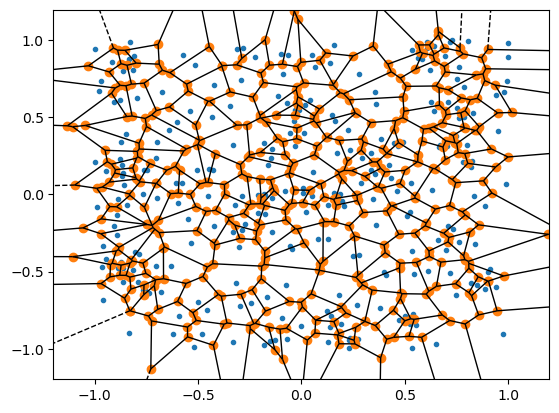

In [161]:
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()

## Area of Voronoi Cells and Shoelace Formula

The following code calculates the areas of Voronoi cells using the $\textbf{shoelace formula}$ (also known as the $\textit{Gauss area formula}$). The $\textbf{shoelace formula}$ allows us to calculate the area of a simple polygon when the coordinates of its vertices are known.

Given a polygon with $n$ vertices listed in order (either clockwise or counterclockwise), with coordinates
$
(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n),
$
the area $A$ of the polygon is given by:

$\boxed{
A = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right|
}$

with the convention that $x_{n+1} = x_1, \quad y_{n+1} = y_1$. This wrapping around to the first vertex ensures the polygon is closed. (The name $\textit{shoelace formula}$ comes from the visual pattern that emerges when the coordinates are written in two columns and lines are drawn connecting terms in the summation.)

In [124]:
# Function to compute polygon area using shoelace formula
def polygon_area(vertices):
    x = vertices[:, 0]
    y = vertices[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Compute areas of finite Voronoi regions
areas = []
for region_index in vor.point_region:
    region = vor.regions[region_index]
    if -1 in region or len(region) == 0:
        # Skip infinite or empty regions
        areas.append(None)
    else:
        polygon = vor.vertices[region]
        area = polygon_area(polygon)
        areas.append(area)

# Display area results
for i, area in enumerate(areas):
    print(f"Region for point {points[i]}: area = {area if area is not None else 'infinite'}")

Region for point [0.28201066 0.87940743]: area = 0.047322484048031854
Region for point [ 0.91907079 -0.84730127]: area = 0.029588457292186288
Region for point [0.10074087 0.39648633]: area = 0.032867960607098054
Region for point [-0.89910302  0.91780979]: area = 0.014126876754118722
Region for point [-0.76978411 -0.0406728 ]: area = 0.046596426230650426
Region for point [-0.83301877  0.95069192]: area = 0.020261946222970284
Region for point [ 0.40123485 -0.31236579]: area = 0.0387090590800635
Region for point [-0.6232678  -0.24227521]: area = 0.026875174268862434
Region for point [-0.81687094 -0.8024407 ]: area = 0.058455121811619826
Region for point [-0.24248073 -0.00648739]: area = 0.03414425336329523
Region for point [0.88942219 0.09400572]: area = 0.044477610728032746
Region for point [-0.38046721 -0.38089941]: area = 0.04951381587311715
Region for point [-0.15163012  0.36956954]: area = 0.05813583636895803
Region for point [0.31257257 0.17204657]: area = 0.03244891551614271
Region